In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SMSSpamCollection" , sep='\t' ,names=['label','text'])

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.loc[3 , 'text']

'U dun say so early hor... U c already then say...'

In [6]:
### Seperate the input and output data

In [7]:
#INPUT
x = df['text']

#OUTPUT
y = df['label']

In [8]:
set(y)

{'ham', 'spam'}

In [9]:
#set(x)

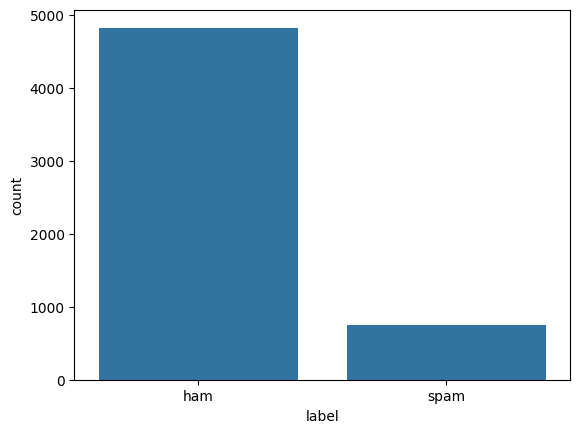

In [10]:
sns.countplot(x=y);

In [11]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

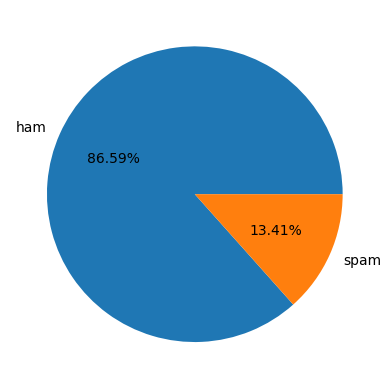

In [12]:
plt.pie(y.value_counts() , labels=y.value_counts().index , autopct='%2.2f%%');

In [13]:
#pip install pip -U

In [14]:
#pip install pillow wordcloud -U

In [15]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [16]:
x[0] + x[1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...'

In [17]:
# Filtered the spam and ham messages
spam = x[y=='spam']
not_spam = x[y=='ham']
spam.shape, not_spam.shape

((747,), (4825,))

In [18]:
spam = ' '.join(spam)
not_spam = ' '.join(not_spam)

In [19]:
from wordcloud import WordCloud

In [20]:
wc = WordCloud(background_color='white', font_path='calibri.ttf', max_words=101).generate(not_spam)

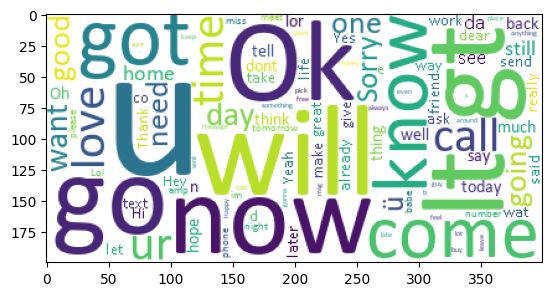

In [21]:
plt.imshow(wc)

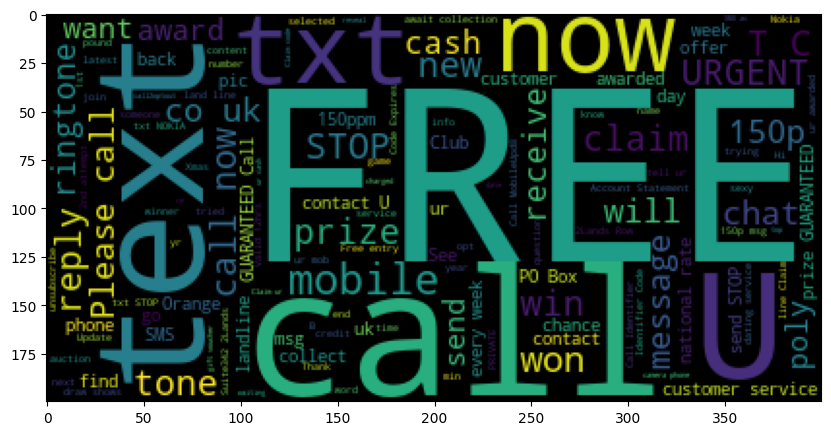

In [22]:
wc = WordCloud().generate(spam)
plt.figure(figsize=(10,8))
plt.imshow(wc)

In [23]:
wc_spam = WordCloud(background_color='white', font_path='calibri.ttf', max_words=101).generate(spam)

In [24]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

## DATA PREPARATION

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [26]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [27]:
# 1. Tokenize the text
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [28]:
# 2. Remove the punctuations
token2 = [token for token in tokens1 if token.isalnum()]
token2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [29]:
# 3. Remove the stopwords
swords = stopwords.words('english')
tokens3 = [token for token in token2 if token.lower() not in swords]
tokens3

['Hello', 'friends', 'like', 'Python', 'Programming']

In [30]:
# 4. Remove the suffixes from the text
ps =  PorterStemmer()
tokens4 = [ps.stem(x) for x in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [31]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    token2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token for token in token2 if token.lower() not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

clean_text(sent)


['hello', 'friend', 'like', 'python', 'program']

In [32]:
sent1 = "It was expected result on the occassion."
clean_text(sent1)

['expect', 'result', 'occass']

In [33]:
x.loc[400]

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

In [34]:
clean_text(x.loc[400])

['hmmm',
 'k',
 'want',
 'chang',
 'field',
 'quickli',
 'da',
 'wan',
 'na',
 'get',
 'system',
 'administr',
 'network',
 'administr']

In [35]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [36]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [39]:
x_new = tfidf.fit_transform(x)

In [40]:
x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

### Cross Validation

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y , random_state=0)

In [43]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((4179, 6854), (4179,), (1393, 6854), (1393,))

In [44]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'é', 'ü', '〨ud'], dtype=object)

In [45]:
### Build the model leearnimg classification model

In [46]:
from sklearn.svm import SVC

In [47]:
svm  = SVC(kernel='poly' , random_state=0)

In [48]:

%%time
svm.fit(x_train , y_train)

CPU times: total: 1.89 s
Wall time: 1.92 s


SVC(kernel='poly', random_state=0)

In [49]:
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay

y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9361091170136396


In [50]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      1208
        spam       1.00      0.52      0.68       185

    accuracy                           0.94      1393
   macro avg       0.97      0.76      0.82      1393
weighted avg       0.94      0.94      0.93      1393



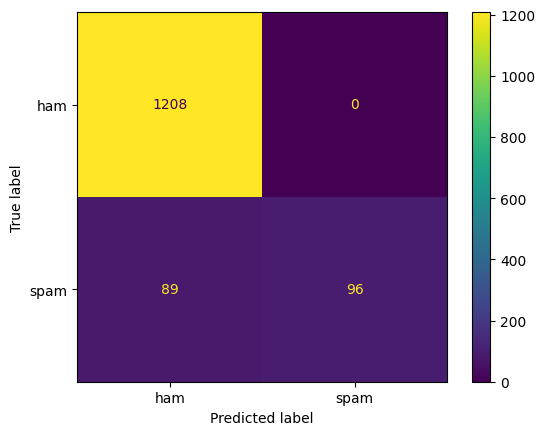

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [52]:
#rbf = 0.9798994974874372
#linear = 0.9834888729361091
#poly = 0.9361091170136396
# sigmoid = 0.9806173725771715

### Prediction on Unseen Data

In [53]:
f = open("sample.csv")

In [54]:
data = f.readlines()

In [55]:
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [56]:
tfidf.transform(data)

<3x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [57]:
svm.predict(tfidf.transform(data))

array(['ham', 'spam', 'ham'], dtype=object)

### Serialize the objects

In [58]:
import joblib

In [59]:
joblib.dump(svm,'classifier.model')

['classifier.model']

In [60]:
joblib.dump(tfidf,'preprocessor.model')

['preprocessor.model']